Please **submit this Jupyter notebook through Canvas** no later than **Monday November 19, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

-----
# Exercise 1

# (a)
We have the table of data in the next cell.

Using `numpy.linalg.lstsq()`, fit a straight line, a quadratic function, and a cubic function to these data. Plot the data and your fitted functions in a graph.

Linear function: w = -0.641356506994 * t + 69.6205341246
Quadratic function: w = 0.00812117728263 * t^2 -1.44754422666 * t + 81.9406868374
Cubic function: w = 4.1039644136e-05 * t^3 + 0.00185241584607 * t^2 -1.20268580971 * t + 80.1852511316


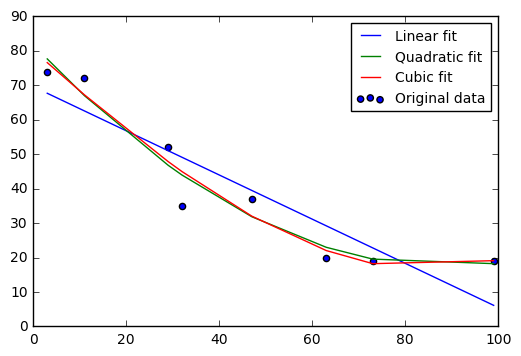

In [41]:
import numpy as np
import matplotlib.pyplot as plt

t = np.array([3, 11, 29, 32, 47, 63, 73, 99], dtype=np.float)
w = np.array([74, 72, 52, 35, 37, 20, 19, 19], dtype=np.float)


# linear equation
Alin = np.vstack([t, np.ones(len(t))]).T
m, c = np.linalg.lstsq(Alin, w)[0]
print "Linear function: w =", m, "* t +", c

fig, ax = plt.subplots()
ax.scatter(t, w, label = "Original data")
ax.plot(t, m*t + c, label = "Linear fit")
ax.set_xlim(0, 100)

# quadratic equation
Aqua = np.vstack([np.ones(len(t)), t, t**2]).T
c, b, a = np.linalg.lstsq(Aqua, w)[0]
print "Quadratic function: w =", a, "* t^2", b, "* t +", c 

ax.plot(t, a*(t**2) + b*t + c, label = "Quadratic fit")

# cubic function
Acub = np.vstack([np.ones(len(t)), t, t**2, t**3]).T
d, c, b, a = np.linalg.lstsq(Acub, w)[0]
print "Cubic function: w =", a, "* t^3 +", b, "* t^2", c, "* t +", d 

ax.plot(t, a*(t**3) + b*(t**2) + c*t + d, label = "Cubic fit")

ax.legend(fontsize = "medium")
plt.show()

## (b)
Compute the condition number of the associated Vandermonde matrix in each case.

In [48]:
# Morgen vragen wat de bedoeling is!

Alinnorm = np.linalg.norm(Alin)
Alininvnorm = np.linalg.norm(np.linalg.pinv(Alin))
condAlin = Alinnorm * Alininvnorm
print condAlin

print np.linalg.cond(Alin)
print np.linalg.cond(Aqua)
print np.linalg.cond(Acub)



95.990207304
95.9797884438
10562.2147892
1192946.87716


----
# Exercise 2
Planets follow an elliptical orbit, which can be represented in a Cartesian $(x,y)$-coordinate system by the equation
$$ ay^2 + bxy + cx + dy + e = x^2. $$

## (a)
Use `numpy.linalg.lstsq()` to determine the orbital parameters $a,b,c,d,e$ for the table of observations given below.
In addition, plot the resulting orbit and the data points in the $(x,y)$-plane.

[ 0.00014824]


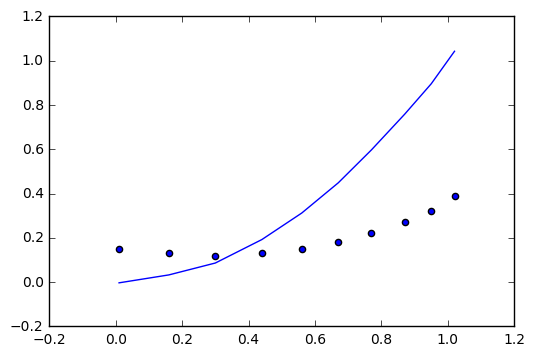

In [69]:
# vraag morgen weer!!

x = np.array([1.02, 0.95, 0.87, 0.77, 0.67, 0.56, 0.44, 0.30, 0.16, 0.01], dtype=np.float)
y = np.array([0.39, 0.32, 0.27, 0.22, 0.18, 0.15, 0.13, 0.12, 0.13, 0.15], dtype=np.float)

planetA = np.vstack([y**2, x*y, x, y, np.ones(len(y))]).T
a, b, c, d, e = np.linalg.lstsq(planetA, x**2)[0]
print np.linalg.lstsq(planetA, x**2)[1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, a*(y**2) + b * x * y + c * x + d * y + e)
plt.show()

## (b)
This least squares problem is nearly rank-deficient. To see what effect this has on the solution, perturb the input data slightly by adding random noise between -0.005 and 0.005 (using, for instance, `numpy.random.rand`), and solve the least squares problem with the perturbed data. Compare the new values for the parameters with those from (a). What effect does this difference have on the plot of the orbit?

[ 1.02  0.95  0.87  0.77  0.67  0.56  0.44  0.3   0.16  0.01]
[ 0.39  0.32  0.27  0.22  0.18  0.15  0.13  0.12  0.13  0.15]
[ 1.02243983  0.94534287  0.87221889  0.77307948  0.67177356  0.5588165
  0.43832313  0.30118028  0.16290977  0.00836796]
[ 0.38644919  0.32309248  0.26588965  0.22095801  0.17890556  0.15363832
  0.13499878  0.11663567  0.13277814  0.1535148 ]
[ 0.00061693]


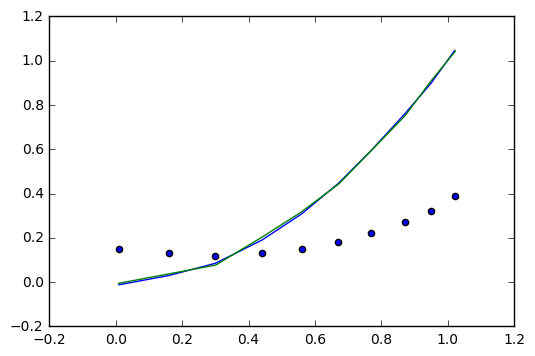

In [71]:
minv = -0.005
maxv = 0.005

xnoise = []
ynoise = []
print x
print y

for i in list(range(0, len(x))):
    xnoise.append(x[i] + (minv + np.random.rand() * (maxv - minv)))
    ynoise.append(y[i] + (minv + np.random.rand() * (maxv - minv)))
    
xnoise = np.array(xnoise, dtype = np.float)
ynoise = np.array(ynoise, dtype = np.float)
    
print xnoise
print ynoise

planetA = np.vstack([ynoise**2, xnoise*ynoise, xnoise, ynoise, np.ones(len(ynoise))]).T
a, b, c, d, e = np.linalg.lstsq(planetA, xnoise**2)[0]
print np.linalg.lstsq(planetA, xnoise**2)[1]

fig, ax = plt.subplots()
ax.scatter(x, y)
ax.plot(x, a*(y**2) + b * x * y + c * x + d * y + e)
ax.plot(xnoise, a*(ynoise**2) + b * xnoise * ynoise + c * xnoise + d * ynoise + e)
plt.show()

## (c)
Can you explain this behaviour?

## (d)
Solve the same least squares problem again, for both the original *and* the perturbed data, this time using a routine specifically designed to deal with rank deficiencies. An example is `numpy.linalg.lstsq`, with the argument `rcond` as tolerance. Experiment with various tolerances, say $10^-k$ for $k \in \{1, ..., 5\}$. Compare the behaviour of the two solutions (one for the original input data, one for the perturbed data). How well do the resulting orbits fit the data points as the tolerance varies?